Bu proje literatürdeki makine öğrenmesi ve derin öğrenme algoritmaları kullanılarak hazırlanmaya çalışıldı.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scikeras

In [ ]:
# Gerekli kütüphaneler içe aktarıldı
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, make_scorer, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
import xgboost as xgb
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv2D, MaxPooling2D, Flatten
from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_predict
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_predict

In [ ]:
# Veri kümesi yüklendi
data_diabetes = pd.read_csv('/content/drive/MyDrive/datas/diabetes_012_health_indicators_BRFSS2015.csv')  # Diyabet veri kümesi
data_sleep = pd.read_csv('/content/drive/MyDrive/datas/Sleep_health_and_lifestyle_dataset.csv')  # Uyku Bozukluğu veri kümesi
for i in data_diabetes.columns:
  print(data_diabetes[i].describe())
for j in data_sleep.columns:
  print(data_sleep[j].describe())


count    253680.000000
mean          0.296921
std           0.698160
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Diabetes_012, dtype: float64
count    253680.000000
mean          0.429001
std           0.494934
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighBP, dtype: float64
count    253680.000000
mean          0.424121
std           0.494210
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighChol, dtype: float64
count    253680.000000
mean          0.962670
std           0.189571
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CholCheck, dtype: float64
count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000

In [ ]:
# Gerekli öznitelikler seçildi
features_diabetes = ['BMI', 'Age', 'PhysActivity', 'Fruits', 'Veggies']  # Diyabet öznitelikleri
features_sleep = ['Sleep Duration','Physical Activity Level', 'Stress Level']  # Uyku Bozukluğu öznitelikleri


In [ ]:
# Diyabet ve uyku bozukluğu verileri birleştirildi
merged_data = pd.merge(data_diabetes[features_diabetes + ['Diabetes_012']], data_sleep[features_sleep + ['Quality of Sleep']], left_index=True, right_index=True)
print(merged_data)
for k in merged_data.columns:
  print(merged_data[k].describe())


      BMI   Age  PhysActivity  Fruits  Veggies  Diabetes_012  Sleep Duration  \
0    40.0   9.0           0.0     0.0      1.0           0.0             6.1   
1    25.0   7.0           1.0     0.0      0.0           0.0             6.2   
2    28.0   9.0           0.0     1.0      0.0           0.0             6.2   
3    27.0  11.0           1.0     1.0      1.0           0.0             5.9   
4    24.0  11.0           1.0     1.0      1.0           0.0             5.9   
..    ...   ...           ...     ...      ...           ...             ...   
369  44.0   4.0           1.0     1.0      1.0           2.0             8.1   
370  32.0   6.0           1.0     1.0      1.0           0.0             8.0   
371  36.0   6.0           0.0     1.0      1.0           0.0             8.1   
372  25.0   5.0           1.0     1.0      0.0           0.0             8.1   
373  29.0   5.0           0.0     0.0      0.0           0.0             8.1   

     Physical Activity Level  Stress Le

                  Diabetes_012       BMI       Age  Stress Level  \
Diabetes_012          1.000000  0.197646  0.211466      0.001529   
BMI                   0.197646  1.000000 -0.048225     -0.045729   
Age                   0.211466 -0.048225  1.000000      0.094441   
Stress Level          0.001529 -0.045729  0.094441      1.000000   
Sleep Duration        0.034578  0.057833 -0.047001     -0.811023   
Quality of Sleep      0.020339  0.056795 -0.083400     -0.898752   

                  Sleep Duration  Quality of Sleep  
Diabetes_012            0.034578          0.020339  
BMI                     0.057833          0.056795  
Age                    -0.047001         -0.083400  
Stress Level           -0.811023         -0.898752  
Sleep Duration          1.000000          0.883213  
Quality of Sleep        0.883213          1.000000  


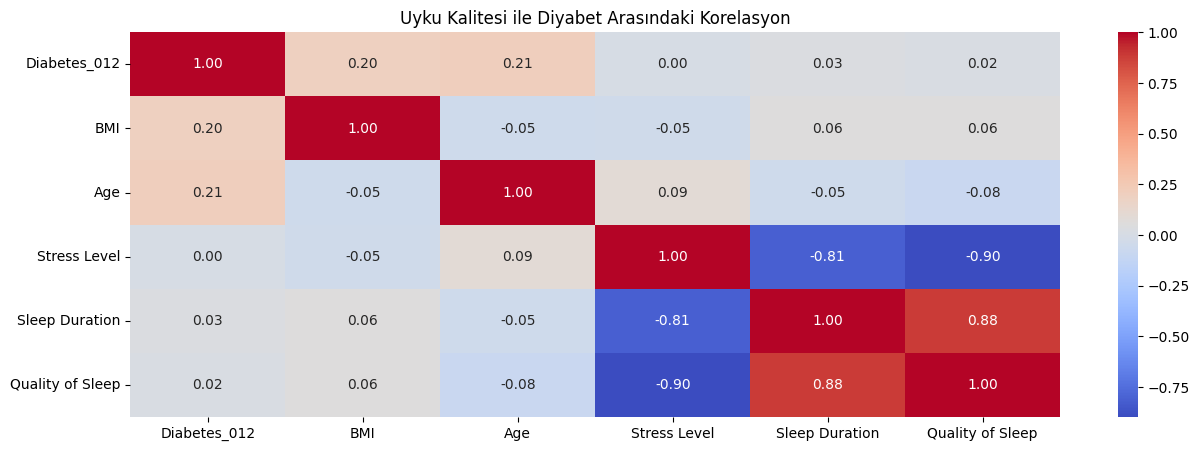

In [ ]:
# Korelasyon matrisini hesaplama
corr_matrix = merged_data[['Diabetes_012', 'BMI', 'Age', 'Stress Level', 'Sleep Duration', 'Quality of Sleep']].corr()
print(corr_matrix)
plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Uyku Kalitesi ile Diyabet Arasındaki Korelasyon')
plt.show()

In [ ]:
# Veri kümesi eğitim ve test alt kümelerine ayrıldı
X_train, X_test, y_train, y_test = train_test_split(merged_data[['Quality of Sleep', 'BMI', 'Age', 'Sleep Duration', 'Stress Level']], merged_data['Diabetes_012'], test_size=0.3, random_state=42)


In [ ]:
# Gradient Boosting Regresyon
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_preds)
mae = mean_absolute_error(y_test, gb_preds)
rmse = np.sqrt(gb_mse)
print("Gradient Boosting Regression MSE:", gb_mse)
print("Gradient Boosting Regression MAE:", mae)
print("Gradient Boosting Regression RMSE:", rmse)

Gradient Boosting Regression MSE: 0.7806914270518756
Gradient Boosting Regression MAE: 0.6957077092976957
Gradient Boosting Regression RMSE: 0.8835674434087505


In [ ]:
# Cross Validation ile Gradient Boosting Regresyon
gb_model = GradientBoostingRegressor()
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean MSE:", cv_scores.mean())


Cross-Validation MSE Scores: [1.14398302 0.70873043 0.77437576 0.99885908 0.96861587]
Mean MSE: 0.9189128318065439


In [ ]:
# ANN
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train, y_train, epochs=500, batch_size=32)
ann_preds = ann_model.predict(X_test)
ann_mse = mean_squared_error(y_test, ann_preds)
ann_mae = mean_absolute_error(y_test, ann_preds)
ann_rmse = np.sqrt(ann_mse)

print("ANN MSE:", ann_mse)
print("ANN MAE:", ann_mae)
print("ANN RMSE:", ann_rmse)


Epoch 1/500
9/9 [==============================] - 1s 5ms/step - loss: 5.1612
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 1.7094
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9003
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9202
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7804
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7174
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7058
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7021
Epoch 9/500
9/9 [==============================] - 0s 4ms/step - loss: 0.6899
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6928
Epoch 11/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6882
Epoch 12/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6940
Epoch 13/500
9/9 [==============================] - 0s 2ms/st

In [ ]:
# Cross Validation ile ANN
def create_ann_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
ann_regressor = KerasRegressor(build_fn=create_ann_model, epochs=500, batch_size=32, verbose=0)
ann_preds = cross_val_predict(ann_regressor, X_train, y_train, cv=5)
ann_mse = mean_squared_error(y_train, ann_preds)
ann_mae = mean_absolute_error(y_train, ann_preds)
ann_rmse = np.sqrt(ann_mse)

print("Cross-Validation MSE:", ann_mse)
print("Cross-Validation MAE:", ann_mae)
print("Cross-Validation RMSE:", ann_rmse)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Cross-Validation MSE: 0.7989055991743463
Cross-Validation MAE: 0.7521728556246364
Cross-Validation RMSE: 0.8938151929646007


In [ ]:
# LSTM
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train.values.reshape(-1, X_train.shape[1], 1), y_train, epochs=500, batch_size=32)
lstm_preds = lstm_model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
lstm_mse = mean_squared_error(y_test, lstm_preds)
lstm_mae = mean_absolute_error(y_test, lstm_preds)
lstm_rmse = np.sqrt(lstm_mse)

print("LSTM MSE:", lstm_mse)
print("LSTM MAE:", lstm_mae)
print("LSTM RMSE:", lstm_rmse)

Epoch 1/500
9/9 [==============================] - 2s 6ms/step - loss: 0.8292
Epoch 2/500
9/9 [==============================] - 0s 6ms/step - loss: 0.8210
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 0.7438
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 0.7363
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 0.7208
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 0.7188
Epoch 7/500
9/9 [==============================] - 0s 4ms/step - loss: 0.7157
Epoch 8/500
9/9 [==============================] - 0s 4ms/step - loss: 0.7203
Epoch 9/500
9/9 [==============================] - 0s 4ms/step - loss: 0.7116
Epoch 10/500
9/9 [==============================] - 0s 4ms/step - loss: 0.7201
Epoch 11/500
9/9 [==============================] - 0s 4ms/step - loss: 0.7053
Epoch 12/500
9/9 [==============================] - 0s 4ms/step - loss: 0.7198
Epoch 13/500
9/9 [==============================] - 0s 4ms/st

In [ ]:
# Cross Validation ile LSTM
def create_lstm_model():
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
lstm_regressor = KerasRegressor(build_fn=create_lstm_model, epochs=500, batch_size=32, verbose=0)
kfold = KFold(n_splits=5)
mse_scores = -cross_val_score(lstm_regressor, X_train.values.reshape(-1, X_train.shape[1], 1), y_train, cv=kfold, scoring='neg_mean_squared_error')

print("Cross-Validation MSE Scores:", mse_scores)
print("Cross-Validation Mean MSE:", mse_scores.mean())


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Cross-Validation MSE Scores: [1.08361923 0.62333224 0.69546375 0.84270553 0.97417687]
Cross-Validation Mean MSE: 0.8438595252045978


In [ ]:
#Decision Tree
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')

print("Decision Tree - Accuracy:", dt_accuracy)
print("Decision Tree - Precision:", dt_precision)
print("Decision Tree - Recall:", dt_recall)


Decision Tree - Accuracy: 0.6460176991150443
Decision Tree - Precision: 0.6746085772634445
Decision Tree - Recall: 0.6460176991150443


In [ ]:
# SVM
model_svm = SVC(C=0.1, gamma='scale', kernel='linear')
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM - Accuracy:", accuracy_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
print("SVM - Precision:", precision_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
print("SVM - Recall:", recall_svm)

SVM - Accuracy: 0.7964601769911505
SVM - Precision: 0.6343488135327747
SVM - Recall: 0.7964601769911505


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Cross Validation ile SVM
model_svm = SVC()
cv_scores_accuracy = cross_val_score(model_svm, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores_accuracy)
print("Mean Accuracy:", cv_scores_accuracy.mean())


Cross-Validation Accuracy Scores: [0.73584906 0.75       0.73076923 0.73076923 0.73076923]
Mean Accuracy: 0.7356313497822933


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN - Accuracy:", accuracy_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
print("KNN - Precision:", precision_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print("KNN - Recall:", recall_knn)

KNN - Accuracy: 0.7079646017699115
KNN - Precision: 0.6804326450344149
KNN - Recall: 0.7079646017699115


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Model Ensemble Bagging ile KNN
bagging_model = BaggingClassifier(base_estimator=model_knn, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
print("Accuracy:", accuracy_bagging)
print("Precision:", precision_bagging)
print("Recall:", recall_bagging)

Accuracy: 0.6902654867256637
Precision: 0.6726805595204111
Recall: 0.6902654867256637


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Lojistik Regresyon
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression - Accuracy:", accuracy_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression - Precision:", precision_lr)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression - Recall:", recall_lr)

Logistic Regression - Accuracy: 0.8053097345132744
Logistic Regression - Precision: 0.8347029077117573
Logistic Regression - Recall: 0.8053097345132744


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier - Accuracy:", accuracy_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Classifier - Precision:", precision_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Classifier - Recall:", recall_rf)

Random Forest Classifier - Accuracy: 0.7433628318584071
Random Forest Classifier - Precision: 0.6992299735662567
Random Forest Classifier - Recall: 0.7433628318584071


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes - Accuracy:", accuracy_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes - Precision:", precision_nb)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes - Recall:", recall_nb)

Naive Bayes - Accuracy: 0.7964601769911505
Naive Bayes - Precision: 0.7728072311980733
Naive Bayes - Recall: 0.7964601769911505


In [ ]:
# Multilayer Perceptron (MLP)
model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP - Accuracy:", accuracy_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
print("MLP - Precision:", precision_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
print("MLP - Recall:", recall_mlp)

MLP - Accuracy: 0.7964601769911505
MLP - Precision: 0.7359483377182492
MLP - Recall: 0.7964601769911505


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Cross Validation ile MLP
model_mlp = MLPClassifier()
cv_scores = cross_val_score(model_mlp, X_train, y_train, cv=5)
average_cv_accuracy = cv_scores.mean()
model_mlp.fit(X_train, y_train)
y_pred_mlp = model_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
print("Cross-Validation Mean Accuracy:", average_cv_accuracy)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)

Cross-Validation Mean Accuracy: 0.7395500725689405
Precision: 0.6343488135327747
Recall: 0.7964601769911505


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# XGBoost
model_xg = xgb.XGBClassifier()
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print("XGBoost - Accuracy:", accuracy_xg)
precision_xg = precision_score(y_test, y_pred_xg, average='weighted')
print("XGBoost - Precision:", precision_xg)
recall_xg = recall_score(y_test, y_pred_xg, average='weighted')
print("XGBoost - Recall:", recall_xg)

XGBoost - Accuracy: 0.6548672566371682
XGBoost - Precision: 0.6588777302707899
XGBoost - Recall: 0.6548672566371682


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Cross Validation ile XGBoost
model_xg = xgb.XGBClassifier()
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted')}
cv_results = cross_validate(model_xg, X_train, y_train, cv=5, scoring=scoring)

print("Cross-Validation Accuracy:", cv_results['test_accuracy'].mean())
print("Cross-Validation Precision:", cv_results['test_precision'].mean())
print("Cross-Validation Recall:", cv_results['test_recall'].mean())

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy: 0.597822931785196
Cross-Validation Precision: 0.5862980147632701
Cross-Validation Recall: 0.597822931785196


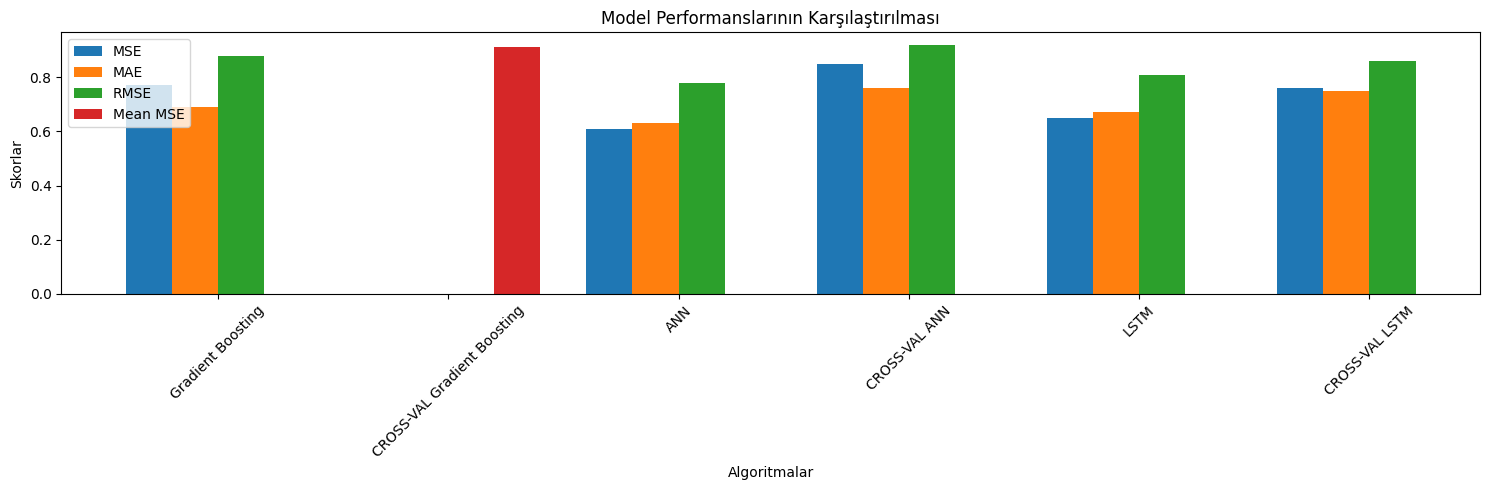

In [ ]:
#Algoritmalardan mse, mae, rmse metrikleri uygulananların sonuçları grafik ile gösterildi

algorithms = ['Gradient Boosting', 'CROSS-VAL Gradient Boosting', 'ANN', 'CROSS-VAL ANN', 'LSTM', 'CROSS-VAL LSTM']
mse_scores = [0.77, np.nan, 0.61, 0.85, 0.65, 0.76]
mae_scores = [0.69, np.nan, 0.63, 0.76, 0.67, 0.75]
rmse_scores = [0.88, np.nan, 0.78, 0.92, 0.81, 0.86]
mean_mse_scores = [np.nan, 0.91, np.nan, np.nan, np.nan, np.nan]

bar_width = 0.2
index = np.arange(len(algorithms))

plt.figure(figsize=(15, 5))

plt.bar(index, mse_scores, width=bar_width, label='MSE')
plt.bar(index + bar_width, mae_scores, width=bar_width, label='MAE')
plt.bar(index + 2 * bar_width, rmse_scores, width=bar_width, label='RMSE')
plt.bar(index + 3 * bar_width, mean_mse_scores, width=bar_width, label='Mean MSE')

plt.xlabel('Algoritmalar')
plt.ylabel('Skorlar')
plt.title('Model Performanslarının Karşılaştırılması')
plt.xticks(index + 1.5 * bar_width, algorithms, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


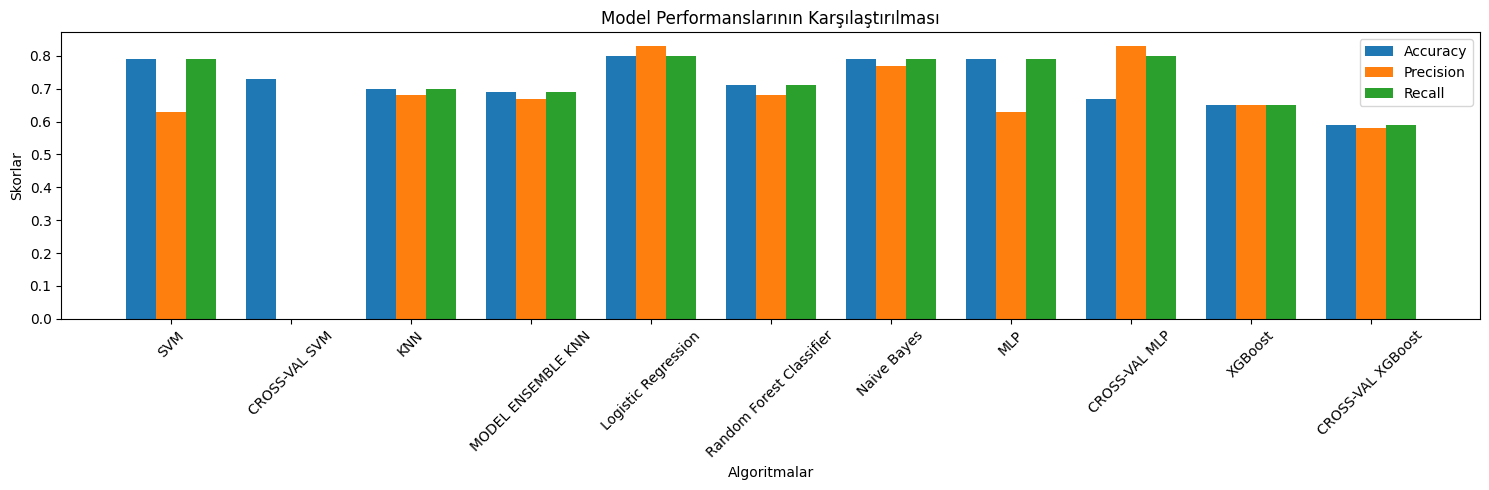

In [ ]:
#Algoritmalardan accuracy, precision, recall metrikleri uygulananların sonuçları grafik ile gösterildi

algorithms = ['SVM', 'CROSS-VAL SVM', 'KNN', 'MODEL ENSEMBLE KNN', 'Logistic Regression', 'Random Forest Classifier', 'Naive Bayes', 'MLP', 'CROSS-VAL MLP', 'XGBoost', 'CROSS-VAL XGBoost']
accuracy_scores = [0.79, 0.73, 0.70, 0.69, 0.80, 0.71, 0.79, 0.79, 0.67, 0.65, 0.59]
precision_scores = [0.63, np.nan, 0.68, 0.67, 0.83, 0.68, 0.77, 0.63, 0.83, 0.65, 0.58]
recall_scores = [0.79, np.nan, 0.70, 0.69, 0.80, 0.71, 0.79, 0.79, 0.80, 0.65, 0.59]

bar_width = 0.25
index = np.arange(len(algorithms))

plt.figure(figsize=(15, 5))

plt.bar(index, accuracy_scores, width=bar_width, label='Accuracy')
plt.bar(index + bar_width, precision_scores, width=bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recall_scores, width=bar_width, label='Recall')

plt.xlabel('Algoritmalar')
plt.ylabel('Skorlar')
plt.title('Model Performanslarının Karşılaştırılması')
plt.xticks(index + bar_width, algorithms, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()
